##**Online Workshop - Big Data Analytics untuk Bisnis**


---
*Modul 6 Riset Perilaku Pelanggan Melalui Data Historis*


#**A. Segmentasi Konsumen**

![](https://www.pointillist.com/wp-content/uploads/2018/02/10-Behavioral-Segmentation-Methods-Types.png)

Pada tutorial kali ini, kita akan belajar melakukan segmentasi konsumen berdasarkan *spending behaviour* dari masing-masing konsumen. Pada contoh kali ini kita akan belajar melakukan segmentasi menggunakan algoritma *clustering*. 

Segmentasi konsumen merupakan sebuah hal penting untuk menentukan strategi marketing apa yang cocok untuk diterapkan pada segmen konsumen tertentu. Secara singkat hal yang diharapkan dengan melakukan segmentasi ini adalah agar kita dapat memperlakukan konsumen dengan perilaku yang seragam secara setara dan konsumen dengan karakteristik berbeda se-spesifik mungkin sesuai dengan segmennya.

Adapun tahapan dari proses segmentasi pada tutorial kali ini, antara lain:

1. Import data
2. Analisis data eKsploratif
3. Data preprocessing
4. Clustering
5. Meprediksi kluster dari data baru

In [ ]:
# Import Library for Data Manipulation
import pandas as pd
import numpy as np

In [ ]:
# Import Library for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **1 Import Data**

Data yang digunakan dalam tutorial kali ini cukup simple. Kali ini kita akan belajar melakukan segmentasi berdasarkan dua buah variabel, yaitu: INCOME dan SPEND. 

In [ ]:
# Import Dataset
df = pd.read_csv('https://raw.githubusercontent.com/rc-dbe/bigdatacertification/master/dataset/clustering.csv')
df

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163
...,...,...
298,241,123
299,264,132
300,193,141
301,131,115


In [ ]:
# Prints the Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   INCOME  303 non-null    int64
 1   SPEND   303 non-null    int64
dtypes: int64(2)
memory usage: 4.9 KB


In [ ]:
# Prints Descriptive Statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
INCOME,303.0,245.273927,48.499412,126.0,211.0,240.0,274.0,417.0
SPEND,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0


## **2 Analisis Data Eksploratif**

Secara umum analisis data eksploratif menjawab dua buah pertanyaan menggunakan teknik visualisasi data, yaitu: varians dan kovarians dalam data.

### *2.1 Varians*

Untuk melihat varian dari masing-masing dataset, kita dapat menggunakan teknik visualisasi histogram (numerik) dan barplot (kategorikal).

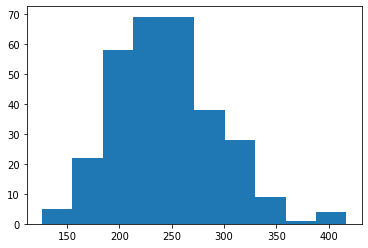

In [ ]:
plt.hist(df.INCOME, bins=10)
plt.show()

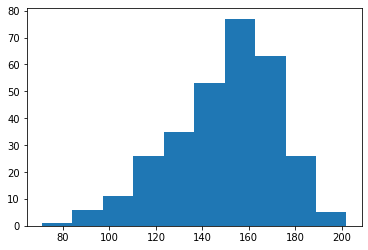

In [ ]:
plt.hist(df.SPEND, bins=10)
plt.show()

Berdasarkan hasil visualisasi, kedua variabel memiliki distribusi data yang tidak normal. 

### *2.2 Kovarians*

Untuk melakukan visualisasi kovarian pada data numerik, kita dapat menggunakan scatter plot.

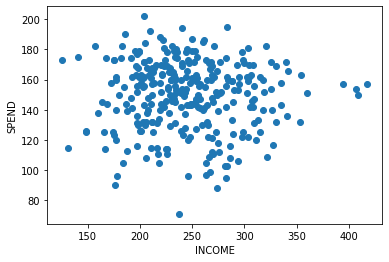

In [ ]:
plt.scatter(df.INCOME, df.SPEND)
plt.xlabel('INCOME')
plt.ylabel('SPEND')
plt.show()

## **3 Data Preprocessing**

Preprocessing yang akan kita lakukan  pada data adalah standardisasi. Standardisasi akan menyeragamkan rentang pengukuran data, dimana setiap data akan memiliki nilai mean 0.

In [ ]:
# Importing Standardscalar Module 
from sklearn.preprocessing import StandardScaler 

# Set Name for StandardScaler as scaler
scaler = StandardScaler() 

# Fit Standardization
column_names = df.columns.tolist()
df[column_names] = scaler.fit_transform(df[column_names])
df.sort_index(inplace=True)
df

,INCOME,SPEND
0,-0.253492,0.015443
1,0.097607,1.633471
2,-0.852427,0.977514
3,-0.191534,1.239897
4,2.245510,0.583939
...,...,...
298,-0.088269,-1.165281
299,0.386748,-0.771706
300,-1.079609,-0.378132
301,-2.360090,-1.515125


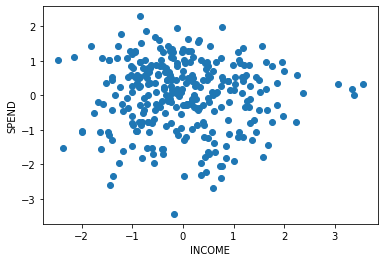

In [ ]:
plt.scatter(df.INCOME, df.SPEND)
plt.xlabel('INCOME')
plt.ylabel('SPEND')
plt.show()

##**4 Clustering**

### *4.1 K-Means*

Algoritma Kmeans adalah algoritma iteratif yang mencoba untuk mempartisi dataset menjadi subkelompok (cluster) non-overlapping berbeda yang ditentukan oleh K dimana setiap titik data hanya dimiliki oleh satu kelompok. Teknik ini mencoba untuk membuat titik data antar cluster semirip mungkin sambil juga menjaga cluster sejauh mungkin. Teknik ini menetapkan poin data ke cluster sedemikian rupa sehingga jumlah jarak kuadrat antara titik data dan pusat massa cluster (rata-rata aritmatika dari semua titik data yang termasuk dalam cluster itu) minimal. Semakin sedikit variasi yang kita miliki dalam cluster, semakin homogen (serupa) titik data dalam cluster yang sama.

#### Mencari Kluster Optimum

In [ ]:
# Transform Data Frame to Numpy Array
data = df.to_numpy()
data

array([[-0.25349239,  0.01544279],
       [ 0.09760718,  1.63347147],
       [-0.85242694,  0.97751389],
       [-0.19153364,  1.23989692],
       [ 2.24551041,  0.58393935],
       [-1.10026193, -0.07201822],
       [ 1.00633547,  0.1466343 ],
       [ 0.36609508,  1.0212444 ],
       [-0.95569152,  0.54020884],
       [-1.59593191,  1.0649749 ],
       [-0.12957489,  0.45274783],
       [ 0.61393007, -0.46559277],
       [ 0.42805383,  0.93378339],
       [-0.70785653, -0.24694024],
       [ 0.7791534 ,  0.54020884],
       [-0.54263321,  0.36528682],
       [ 1.95636959,  0.97751389],
       [-0.3980628 , -1.55885539],
       [ 0.03564843,  0.93378339],
       [-0.12957489,  0.05917329],
       [-0.23283947,  0.49647834],
       [-0.25349239,  1.28362743],
       [-0.3980628 ,  1.23989692],
       [-0.04696323, -0.55305378],
       [-0.95569152,  1.23989692],
       [ 1.1715588 ,  0.54020884],
       [-0.68720362,  0.32155632],
       [-1.4513615 , -1.16528085],
       [ 3.54664411,

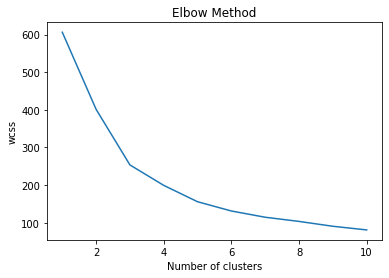

In [ ]:
# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
  
# Visualize 
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

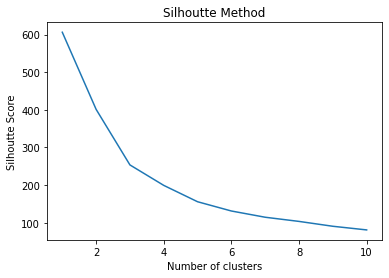

In [ ]:
# Silhoutte Method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

score = []
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(data)
    label = kmeans.labels_
    sil_coeff = silhouette_score(data, label, metric='euclidean')
    score.append(sil_coeff)

# Visualize 
plt.plot(range(1,11),wcss)
plt.title('Silhoutte Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')
plt.show()

Berdasarkan analisis kedua metode tersebut, dapat kita lihat bahwa jumlah kluster optimum yang sesuai untuk data adalah 3.

#### Modeling

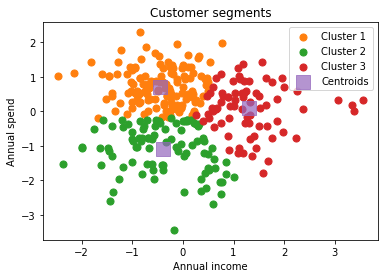

In [ ]:
# Apply the K-Means Model to the Data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=500, n_init=10, random_state=0)
cluster = kmeans.fit_predict(data)

# Visualising Clusters for k=3
sns.scatterplot(x='INCOME', y='SPEND', data=df)
plt.scatter(data[cluster == 0, 0], data[cluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(data[cluster == 1, 0], data[cluster == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(data[cluster == 2, 0], data[cluster == 2, 1], s = 50, label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,marker='s', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income')
plt.ylabel('Annual spend')
plt.legend()
plt.show()

### *4.2 Hierarchical Clustering*

Pengelompokan hierarki (juga disebut analisis klaster hierarki atau HCA) adalah metode analisis klaster yang berupaya membangun hierarki klaster. Endpoint adalah sekumpulan cluster, di mana setiap cluster berbeda satu sama lain, dan objek dalam setiap cluster secara luas mirip satu sama lain.

#### Mencari Kluster Optimum

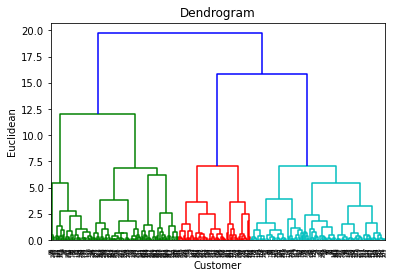

In [ ]:
# Modeling and Visualizing Clusters by Dendogram
import scipy.cluster.hierarchy as sch
dend = sch.dendrogram(sch.linkage(data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean')
plt.show()

Jumlah kluster optimal berdasarkan visualisasi tersebut adalah 3. Hal ini ditunjukkan dengan adanya peningkatan tajam nilai euclidian setelah aglomerasi kluster hijau.

#### Modeling

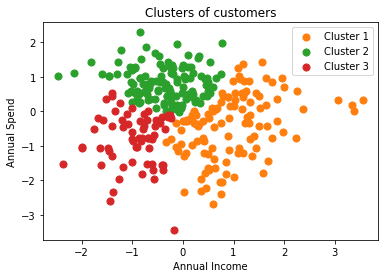

In [ ]:
# Apply the Hierarchical Clustering Model to the Dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hcluster = hc.fit_predict(data)

# Visualising Clusters for k=3
sns.scatterplot(x='INCOME', y='SPEND', data=df)
plt.scatter(data[hcluster == 0, 0], data[hcluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(data[hcluster == 1, 0], data[hcluster == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(data[hcluster == 2, 0], data[hcluster == 2, 1], s = 50, label = 'Cluster 3')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Annual Spend')
plt.legend()
plt.show()

In [ ]:
df["group"] = hcluster.astype("str")

                   
summary = df.groupby('group', as_index=False).mean()

summary

,group,INCOME,SPEND
0,0,290.474138,140.353448
1,1,227.196721,168.286885
2,2,198.538462,131.246154


###*4.3 Membuat Prediksi Kluster Pada Data Baru*

In [ ]:
df2 = pd.DataFrame({
    "INCOME" : [100,300, 400],
    "SPEND" : [200, 300, 500]
})

column_names = df2.columns.tolist()
df2[column_names] = scaler.fit_transform(df2[column_names])
df2.sort_index(inplace=True)
data = df2.to_numpy()
data

array([[-1.33630621, -1.06904497],
       [ 0.26726124, -0.26726124],
       [ 1.06904497,  1.33630621]])

In [ ]:
hcluster = hc.fit_predict(data)
hcluster

array([2, 1, 0])

#**B. Market Basket Analysis**

Analisis Keranjang adalah teknik pemodelan yang didasarkan pada teori bahwa jika Anda membeli sekelompok barang tertentu, kemungkinan besar Anda (lebih atau kurang) akan membeli kelompok barang lain. Misalnya, jika Anda berada di sebuah super market dan membeli ikan, kemungkinan besar Anda akan membeli bumbu dan sayuran pelengkap ikan tersebut pada saat yang sama daripada seseorang yang tidak membeli ikan.

Kumpulan item yang dibeli pelanggan disebut sebagai set item, dan analisis keranjang berusaha menemukan hubungan antar pembelian.


Pada tutorial ini, kita akan membuat model aturan asosiasi dari data ritel online (https://www.kaggle.com/carrie1/ecommerce-data). Data adalah kumpulan data transaksi yang berisi semua transaksi yang terjadi antara 01/12/2010 dan 09/12/2011 untuk retail online non-toko terdaftar yang berbasis di Inggris. Perusahaan ini terutama menjual hadiah unik untuk semua kesempatan. Banyak pelanggan perusahaan adalah pedagang grosir. Data tersebut terdiri dari sejumlah variabel, seperti: InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, dan Country.


Analisis yang akan dilakukan dalam tutorial ini terdiri dari beberapa tahapan:

1. Import data
2. Pemrosesan Data
3. Modeling

In [ ]:
import pandas as pd

## **1 Import Data**

In [ ]:
# Import dataset
df = pd.read_excel("https://github.com/rc-dbe/bigdatacertification/blob/master/dataset/Online%20Retail.xlsx?raw=true")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
# Prints the Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# Prints Descriptive Statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


##**2 Pemrosesan Data**

In [ ]:
# Remove Additional Spaces
df['Description'] = df['Description'].str.strip()

# Remove Missing Values
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)

# Remove Cancelled Orders
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
# Create Encode Function
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

def create_basket(df, country_filter):
    basket = (df[df['Country'] == country_filter]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
    return basket

In [ ]:
# Select Retail Data by Country : France
country_filter = 'France'
basket_french = create_basket(df, 'France')
basket_sets = basket_french.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)
basket_sets

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,3 HOOK HANGER MAGIC GARDEN,3 PIECE SPACEBOY COOKIE CUTTER SET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN RED AND CREAM,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,36 DOILIES VINTAGE CHRISTMAS,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D DOG PICTURE PLAYING CARDS,3D HEARTS HONEYCOMB PAPER GARLAND,3D SHEET OF DOG STICKERS,3D TRADITIONAL CHRISTMAS STICKERS,3D VINTAGE CHRISTMAS STICKERS,4 IVORY DINNER CANDLES SILVER FLOCK,4 PINK DINNER CANDLE SILVER FLOCK,4 TRADITIONAL SPINNING TOPS,5 HOOK HANGER MAGIC TOADSTOOL,5 HOOK HANGER RED MAGIC TOADSTOOL,50'S CHRISTMAS GIFT BAG LARGE,6 GIFT TAGS 50'S CHRISTMAS,...,WOODLAND DESIGN COTTON TOTE BAG,WOODLAND LARGE BLUE FELT HEART,WOODLAND LARGE PINK FELT HEART,WOODLAND LARGE RED FELT HEART,WOODLAND MINI BACKPACK,WOODLAND PARTY BAG + STICKER SET,WOODLAND SMALL BLUE FELT HEART,WOODLAND SMALL PINK FELT HEART,WOODLAND SMALL RED FELT HEART,WOODLAND STORAGE BOX LARGE,WOODLAND STORAGE BOX SMALL,WORLD WAR 2 GLIDERS ASSTD DESIGNS,WRAP VINTAGE DOILY,WRAP 50'S CHRISTMAS,WRAP ALPHABET DESIGN,WRAP CAROUSEL,WRAP CHRISTMAS VILLAGE,WRAP CIRCUS PARADE,WRAP DOILEY DESIGN,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP GINGHAM ROSE,WRAP GREEN PEARS,WRAP I LOVE LONDON,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
581001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
581171,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## **3 Modeling**

In [ ]:
# Import Apriori Module
from mlxtend.frequent_patterns import apriori

# Search for Frequent Itemsets
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.071429,(4 TRADITIONAL SPINNING TOPS)
1,0.096939,(ALARM CLOCK BAKELIKE GREEN)
2,0.102041,(ALARM CLOCK BAKELIKE PINK)
3,0.094388,(ALARM CLOCK BAKELIKE RED)
4,0.068878,(ASSORTED COLOUR MINI CASES)
...,...,...
108,0.102041,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED..."
109,0.122449,"(SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY..."
110,0.063776,"(ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL..."
111,0.068878,"(PLASTERS IN TIN WOODLAND ANIMALS, PLASTERS IN..."


In [ ]:
# Import Association Rules Module
from mlxtend.frequent_patterns import association_rules

# Generate Rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.2)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
4,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,0.064348,4.153061


In [ ]:
# Sorting the Rules by Confidence
rules.sort_values(['confidence'], axis=0, 
                 ascending=False, inplace=True) 
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
82,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.137755,0.099490,0.975000,7.077778,0.085433,34.489796
80,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975000,7.644000,0.086474,34.897959
67,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,0.104878,21.556122
9,(CHILDRENS CUTLERY SPACEBOY),(CHILDRENS CUTLERY DOLLY GIRL),0.068878,0.071429,0.063776,0.925926,12.962963,0.058856,12.535714
39,(PACK OF 6 SKULL PAPER PLATES),(PACK OF 6 SKULL PAPER CUPS),0.056122,0.063776,0.051020,0.909091,14.254545,0.047441,10.298469
...,...,...,...,...,...,...,...,...,...
49,(PLASTERS IN TIN CIRCUS PARADE),(RED TOADSTOOL LED NIGHT LIGHT),0.168367,0.181122,0.051020,0.303030,1.673069,0.020525,1.174911
55,(RED TOADSTOOL LED NIGHT LIGHT),(PLASTERS IN TIN WOODLAND ANIMALS),0.181122,0.170918,0.053571,0.295775,1.730502,0.022614,1.177296
57,(RED TOADSTOOL LED NIGHT LIGHT),(RABBIT NIGHT LIGHT),0.181122,0.188776,0.053571,0.295775,1.566806,0.019380,1.151939
56,(RABBIT NIGHT LIGHT),(RED TOADSTOOL LED NIGHT LIGHT),0.188776,0.181122,0.053571,0.283784,1.566806,0.019380,1.143338
